In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

To ensure consistent and reliable analysis, it’s necessary to perform random sampling across the datasets due to their varying sizes. For instance, Netflix has 18,685 rows of data, Amazon Prime has 59,505 rows, Apple TV has 16,041 rows, Hulu has 8,637 rows, and HBO Max has 5,314 rows. Equalizing the number of rows across these datasets helps in mitigating issues like outliers and ensures a balanced comparison. The most effective method is to use scripts that randomly select data from each dataset to match the size of the smallest dataset, which in this case is HBO Max with 5,314 rows.

By employing random sampling, we can create uniform datasets that are more representative and less prone to biases, thereby facilitating more accurate and meaningful analysis.

In [3]:
import pandas as pd

df_large = pd.read_csv('Apple_TV_Dataset.csv')

df_sampled = df_large.sample(n=5314, random_state=1) # Use random_state for reproducibility

df_sampled.to_csv('sampled_Apple_dataset.csv', index=False)

print("Random sampling completed. Sampled data saved to 'sampled_Apple_dataset.csv'.")

Random sampling completed. Sampled data saved to 'sampled_Apple_dataset.csv'.


In [ ]:
import pandas as pd

df_large = pd.read_csv('Amazon_Prime_Dataset.csv')

df_sampled = df_large.sample(n=5314, random_state=1) # Use random_state for reproducibility

df_sampled.to_csv('sampled_Amazon_dataset.csv', index=False)

print("Random sampling completed. Sampled data saved to 'sampled_Amazon_dataset.csv'.")

In [4]:
import pandas as pd

df_large = pd.read_csv('Netflix_Dataset.csv')

df_sampled = df_large.sample(n=5314, random_state=1) # Use random_state for reproducibility

df_sampled.to_csv('sampled_Netflix_dataset.csv', index=False)

print("Random sampling completed. Sampled data saved to 'sampled_Netflix_dataset.csv'.")

Random sampling completed. Sampled data saved to 'sampled_Netflix_dataset.csv'.


In [5]:
import pandas as pd

df_large = pd.read_csv('Hulu_Dataset.csv')

df_sampled = df_large.sample(n=5314, random_state=1) # Use random_state for reproducibility

df_sampled.to_csv('sampled_Hulu_dataset.csv', index=False)

print("Random sampling completed. Sampled data saved to 'sampled_Hulu_dataset.csv'.")

Random sampling completed. Sampled data saved to 'sampled_Hulu_dataset.csv'.


In [7]:
df = pd.read_csv('sampled_Streaming Services Dataset.csv')
df.head()

,title,type,genres,releaseYear,platform,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Harry & Meghan: The Revelations,movie,"""Documentary, Drama""",2021,HBO Max,tt14534410,1.5,512,"""AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, E..."
1,Velma,tv,"""Adventure, Animation, Comedy""",2023,HBO Max,tt14153790,1.6,79608,"""AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, C..."
2,Justin Bieber's Believe,movie,"""Documentary, Music""",2013,HBO Max,tt3165608,1.6,17938,"""AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, E..."
3,Megamind Rules!,tv,"""Animation, Comedy, Family""",2024,HBO Max,tt18214172,2.0,1035,"""AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, E..."
4,Me contro Te - il Film: Missione Giungla,movie,"""Family, Fantasy""",2023,HBO Max,tt21934046,2.0,115,"""AD, ES, NL, PT"""


In [8]:
summary_stats = df.describe()
print(summary_stats)

        releaseYear  imdbAverageRating  imdbNumVotes
count  26570.000000       26570.000000  2.657000e+04
mean    2009.986376           6.391694  3.570416e+04
std       16.103965           1.170488  1.350110e+05
min     1903.000000           1.200000  5.000000e+00
25%     2007.000000           5.700000  1.940000e+02
50%     2016.000000           6.500000  1.123000e+03
75%     2020.000000           7.200000  9.117500e+03
max     2024.000000           9.800000  2.961822e+06


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               26570 non-null  object 
 1   type                26570 non-null  object 
 2   genres              26570 non-null  object 
 3   releaseYear         26570 non-null  int64  
 4   platform            26570 non-null  object 
 5   imdbId              26570 non-null  object 
 6   imdbAverageRating   26570 non-null  float64
 7   imdbNumVotes        26570 non-null  int64  
 8   availableCountries  26570 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.8+ MB
None


In [10]:
print(df.describe)

<bound method NDFrame.describe of                                           title   type  \
0               Harry & Meghan: The Revelations  movie   
1                                         Velma     tv   
2                       Justin Bieber's Believe  movie   
3                               Megamind Rules!     tv   
4      Me contro Te - il Film: Missione Giungla  movie   
...                                         ...    ...   
26565                      Monster in My Family     tv   
26566                Ankith Pallavi and Friends  movie   
26567                           Harvest of Fire  movie   
26568               McBride: It's Murder, Madam  movie   
26569                                No Way Out  movie   

                               genres  releaseYear  platform      imdbId  \
0                "Documentary, Drama"         2021   HBO Max  tt14534410   
1      "Adventure, Animation, Comedy"         2023   HBO Max  tt14153790   
2                "Documentary, Music"    

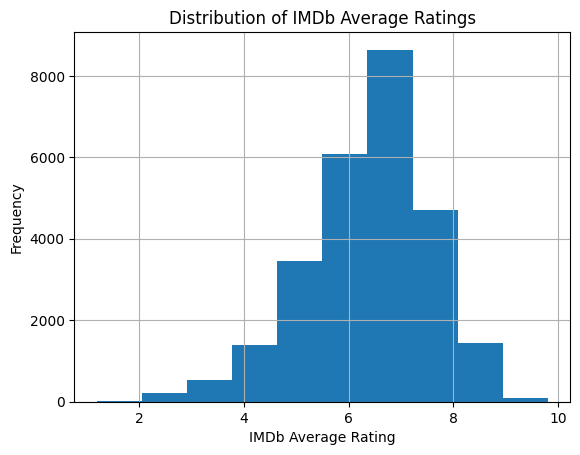

In [11]:
# Histogram from IMDb Average Rating
df['imdbAverageRating'].hist(bins=10)
plt.xlabel('IMDb Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Average Ratings')
plt.show()

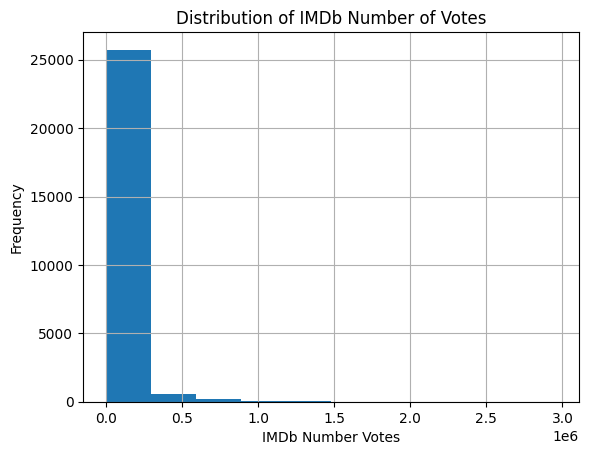

In [17]:
# Histogram from IMDb Number Votes
df['imdbNumVotes'].hist(bins=10)
plt.xlabel('IMDb Number Votes')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Number of Votes')
plt.show()

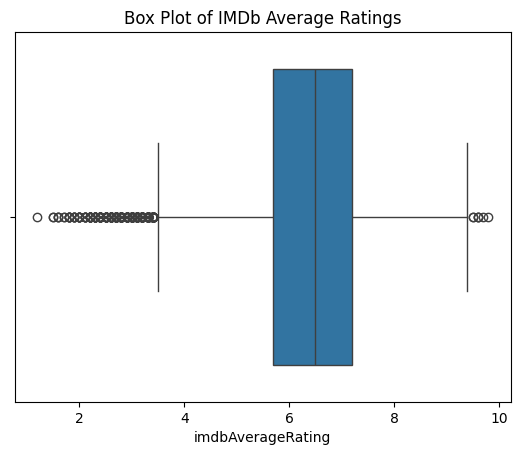

In [12]:
# Box plot for IMDb average rating
sns.boxplot(x=df['imdbAverageRating'])
plt.title('Box Plot of IMDb Average Ratings')
plt.show()

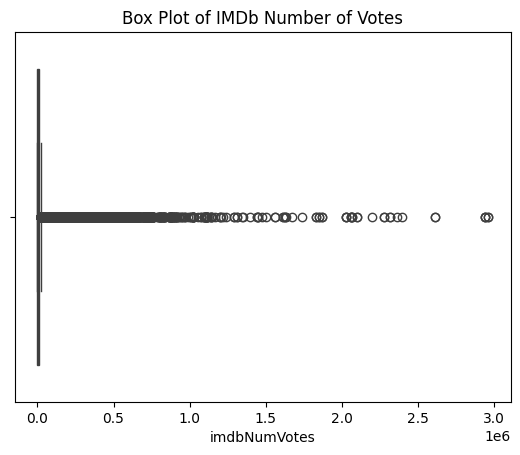

In [18]:
# Box plot for IMDb average rating
sns.boxplot(x=df['imdbNumVotes'])
plt.title('Box Plot of IMDb Number of Votes')
plt.show()

                   releaseYear  imdbAverageRating  imdbNumVotes
releaseYear           1.000000          -0.061824     -0.059104
imdbAverageRating    -0.061824           1.000000      0.216192
imdbNumVotes         -0.059104           0.216192      1.000000


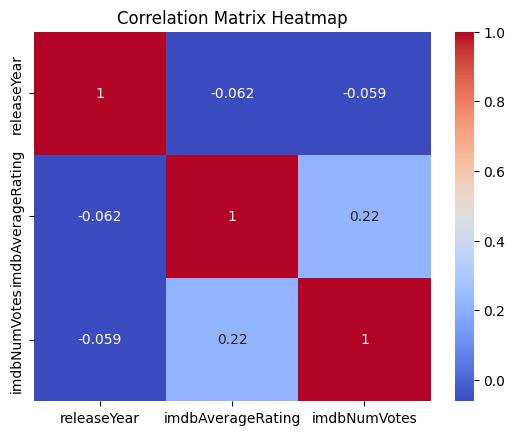

In [13]:
# Correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

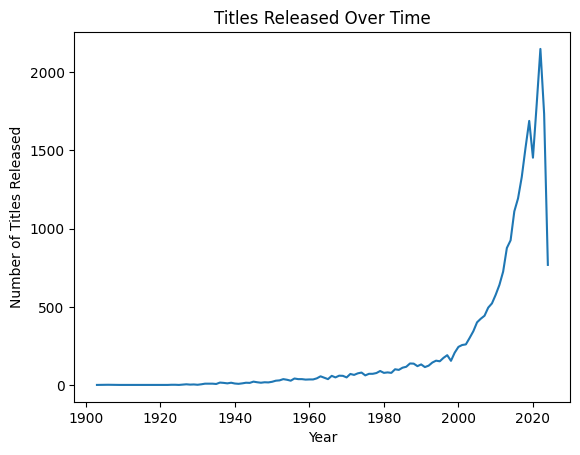

In [14]:
# Titles released over time
release_year_counts = df['releaseYear'].value_counts().sort_index()
release_year_counts.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.title('Titles Released Over Time')
plt.show()

Mean Squared Error: 1.299534666984734
R-squared: 0.04967477566582623


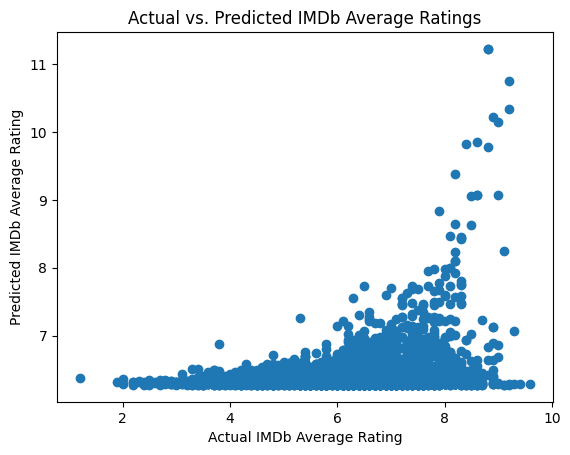

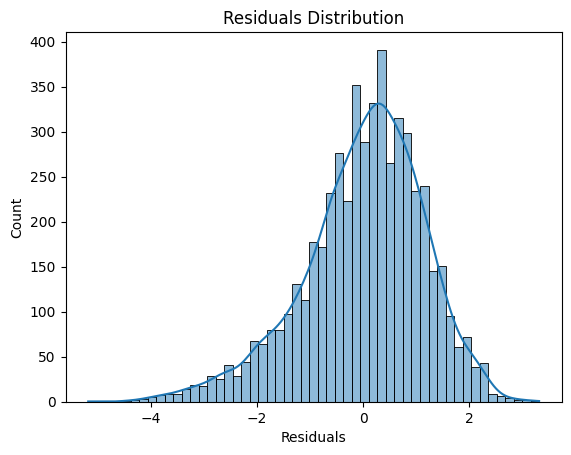

In [15]:
# Data Preprocessing
df.fillna(0, inplace=True) # Handle missing values

# Selecting features and target variable
X = df[['imdbNumVotes', 'releaseYear']] # Independent variables
y = df['imdbAverageRating'] # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual IMDb Average Rating")
plt.ylabel("Predicted IMDb Average Rating")
plt.title("Actual vs. Predicted IMDb Average Ratings")
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

Mean Squared Error: 1.0322037755945466
R-squared: 0.24516882117774863


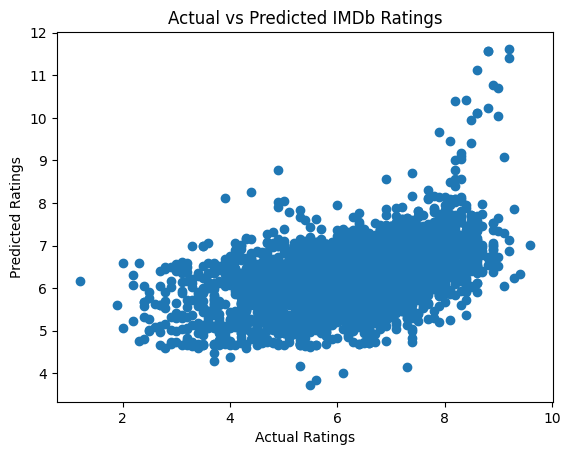

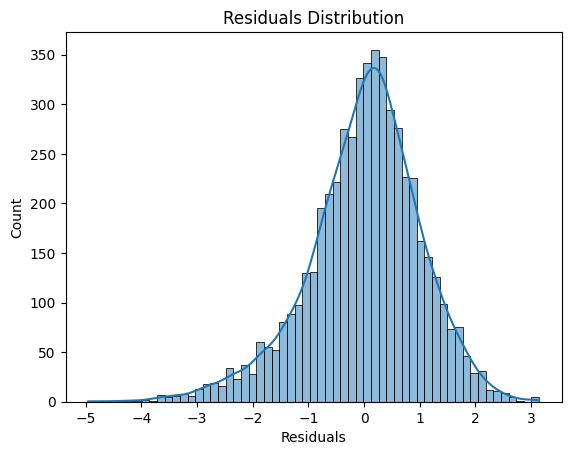

In [16]:
# One-hot encode the genres column
genres_encoded = pd.get_dummies(df['genres'], prefix='genre')

df = pd.concat([df, genres_encoded], axis=1)

X = df[['imdbNumVotes', 'releaseYear'] + list(genres_encoded.columns)]
y = df['imdbAverageRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDb Ratings")
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()